<a href="https://colab.research.google.com/github/thongle28625/ttnt/blob/main/2001230937_LeQuocThong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thực Hành Trí Tuệ Nhân Tạo Buổi 4**

**Bài 1:** Phát triển code bài tập mẫu để đọc file ma trận kề dạng txt bất kỳ và in kết quả tô
màu ra màn hình.

CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ VÀ VẼ HÌNH 
Đọc dữ liệu từ file: /content/graph_input.txt
--------------------------------------------------
Bậc của các đỉnh: [('A', 3), ('B', 4), ('C', 4), ('D', 3), ('E', 3), ('F', 3)]
Thứ tự tô màu tham lam: ['B', 'C', 'A', 'D', 'E', 'F']

KẾT QUẢ TÔ MÀU CUỐI CÙNG:
  Đỉnh A (Bậc 3): Màu Vàng
  Đỉnh B (Bậc 4): Màu Đỏ
  Đỉnh C (Bậc 4): Màu Xanh lá
  Đỉnh D (Bậc 3): Màu Đỏ
  Đỉnh E (Bậc 3): Màu Vàng
  Đỉnh F (Bậc 3): Màu Xanh lá
--------------------------------------------------
TỔNG SỐ MÀU ĐÃ SỬ DỤNG: 3

Đang tạo và hiển thị đồ thị đã tô màu...


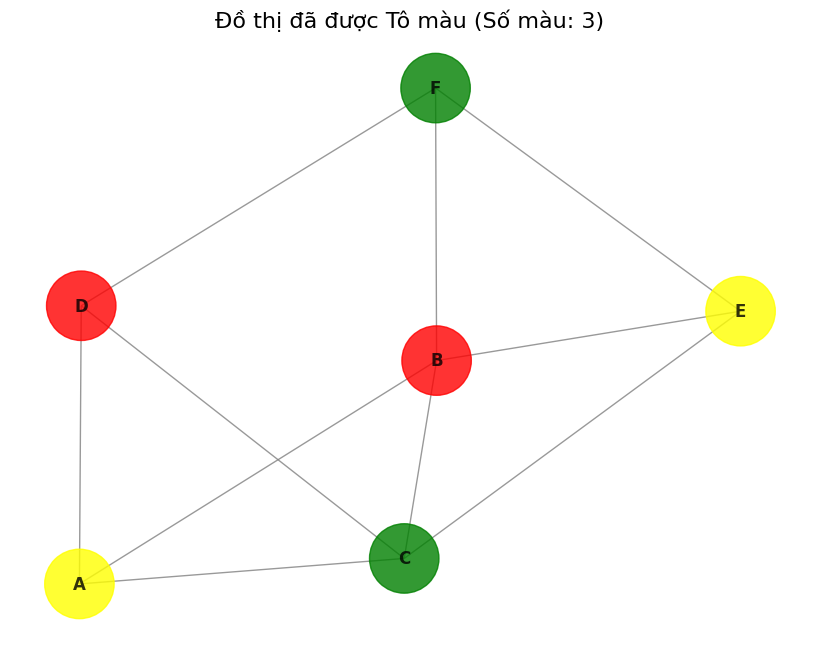

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
# Định nghĩa các màu khả dụng cho thuật toán tô màu
MAU_KHA_DUNG = ["Đỏ", "Xanh lá", "Vàng", "Xanh dương", "Tím", "Cam", "Hồng", "Nâu"]
# --- Phần Hàm Xử lý Dữ liệu ---
def doc_ma_tran_ke(duong_dan_file):
    """Đọc ma trận kề từ file văn bản (.txt)."""
    try:
        # Sử dụng numpy để đọc dữ liệu số (int) từ file
        ma_tran = np.loadtxt(duong_dan_file, dtype=int)
        # Kiểm tra tính hợp lệ: phải là ma trận vuông
        if ma_tran.ndim != 2 or ma_tran.shape[0] != ma_tran.shape[1]:
            raise ValueError("Ma trận kề không hợp lệ (Không phải ma trận vuông).")
        return ma_tran.tolist() # Trả về list of lists
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file tại đường dẫn '{duong_dan_file}'")
        return None
    except Exception as e:
        print(f"Lỗi khi đọc file: {e}")
        return None
def tinh_bac_dinh(G):
    """Tính bậc (degree) của mỗi đỉnh."""
    bac = [sum(hang) for hang in G]
    return bac
def to_mau_do_thi_tham_lam(G):
    """
    Thực hiện thuật toán Tô màu Đồ thị Tham lam (ưu tiên bậc cao).
    """
    so_dinh = len(G)
    if so_dinh == 0:
        return {}, 0
    # 1. Chuẩn bị Dữ liệu cơ bản
    ten_dinh = [chr(65 + i) for i in range(so_dinh)] # Tên đỉnh A, B, C, ...
    dinh_sang_chi_so = {ten: i for i, ten in enumerate(ten_dinh)}
    bac = tinh_bac_dinh(G)
    mau_kha_dung_moi_dinh = {ten: MAU_KHA_DUNG.copy() for ten in ten_dinh}
    ket_qua_to_mau = {} # Kết quả {Tên đỉnh: Màu}
    # 2. Sắp xếp Đỉnh theo Bậc Giảm dần
    du_lieu_dinh = sorted([(bac[i], i) for i in range(so_dinh)],key=lambda x: x[0], reverse=True)
    dinh_da_sap_xep = [ten_dinh[chi_so] for _, chi_so in du_lieu_dinh]
    # 3. Tô màu Tham lam
    for ten_dinh_hien_tai in dinh_da_sap_xep:
        chi_so = dinh_sang_chi_so[ten_dinh_hien_tai]
        # Chọn màu khả dụng đầu tiên
        mau_duoc_chon = mau_kha_dung_moi_dinh[ten_dinh_hien_tai][0]
        ket_qua_to_mau[ten_dinh_hien_tai] = mau_duoc_chon
        # Loại bỏ màu khỏi các đỉnh kề
        for chi_so_dinh_ke in range(so_dinh):
            # Nếu có cạnh nối (G[chi_so][chi_so_dinh_ke] == 1)
            if G[chi_so][chi_so_dinh_ke] == 1:
                ten_dinh_ke = ten_dinh[chi_so_dinh_ke]
                # Nếu màu đang dùng còn khả dụng cho đỉnh kề, thì loại bỏ
                if mau_duoc_chon in mau_kha_dung_moi_dinh[ten_dinh_ke]:
                    mau_kha_dung_moi_dinh[ten_dinh_ke].remove(mau_duoc_chon)
    # Trả về kết quả tô màu và tổng số màu đã sử dụng
    return ket_qua_to_mau, len(set(ket_qua_to_mau.values()))
# --- Hàm Chính (Thực thi chính) ---
if __name__ == "__main__":
    # Đặt tên file ma trận kề của bạn tại đây
    DUONG_DAN_FILE = "/content/graph_input.txt"
    print(f"CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ VÀ VẼ HÌNH ")
    print(f"Đọc dữ liệu từ file: {DUONG_DAN_FILE}")
    # 1. Đọc Ma trận
    ma_tran_ke = doc_ma_tran_ke(DUONG_DAN_FILE)
    if ma_tran_ke is None:
        print("\nChương trình kết thúc do lỗi đọc file.")
    else:
        # 2. Phân tích và Tô màu
        ket_qua_mau, so_mau_su_dung = to_mau_do_thi_tham_lam(ma_tran_ke)
        # Lấy tên các đỉnh (A, B, C...)
        ten_dinh = [chr(65 + i) for i in range(len(ma_tran_ke))]
        bac_dinh = tinh_bac_dinh(ma_tran_ke)
        # 3. In Kết quả Ra Màn hình
        print("-" * 50)
        print(f"Bậc của các đỉnh: {list(zip(ten_dinh, bac_dinh))}")
        print(f"Thứ tự tô màu tham lam: {[ten for ten, _ in sorted([(ten, bac_dinh[i]) for i, ten in enumerate(ten_dinh)], key=lambda x: x[1], reverse=True)]}")
        print("\nKẾT QUẢ TÔ MÀU CUỐI CÙNG:")
        for dinh, mau in sorted(ket_qua_mau.items()):
            print(f"  Đỉnh {dinh} (Bậc {bac_dinh[ord(dinh) - 65]}): Màu {mau}")
        print("-" * 50)
        print(f"TỔNG SỐ MÀU ĐÃ SỬ DỤNG: {so_mau_su_dung}")
        # 4. Vẽ Đồ thị Đã Tô màu
        print("\nĐang tạo và hiển thị đồ thị đã tô màu...")
        try:
            # Tạo đồ thị NetworkX từ ma trận kề
            G_nx = nx.from_numpy_array(np.array(ma_tran_ke))
            # Ánh xạ tên màu tiếng Việt sang mã màu Matplotlib ('blue', 'red'...)
            anh_xa_mau = {
                "Đỏ": 'red', "Xanh lá": 'green', "Vàng": 'yellow', "Xanh dương": 'blue',
                "Tím": 'purple', "Cam": 'orange', "Hồng": 'pink', "Nâu": 'brown'
            }
            # Chuẩn bị danh sách màu cho các đỉnh theo thứ tự chỉ số (0, 1, 2...)
            mau_ve = []
            for i in range(len(ma_tran_ke)):
                ten_dinh_hien_tai = chr(65 + i)
                mau_tieng_viet = ket_qua_mau.get(ten_dinh_hien_tai, 'gray') # Lấy màu từ solution
                mau_ve.append(anh_xa_mau.get(mau_tieng_viet, 'gray'))
            # Xác định vị trí các đỉnh (dùng bố cục spring_layout phổ biến)
            pos = nx.spring_layout(G_nx, seed=42) # Cố định giá trị seed
            # Vẽ đồ thị
            plt.figure(figsize=(8, 6))
            nx.draw(
                G_nx,
                pos, # Vị trí cố định của các đỉnh
                with_labels=True,
                labels={i: chr(65 + i) for i in range(len(ma_tran_ke))},
                node_color=mau_ve, # Mảng màu đã tô
                node_size=2500, # Kích thước đỉnh
                font_color='black',
                font_weight='bold',
                edge_color='gray',
                linewidths=1,
                alpha=0.8
            )
            plt.title(f"Đồ thị đã được Tô màu (Số màu: {so_mau_su_dung})", fontsize=16)
            plt.show() # Hiển thị hình ảnh

        except ImportError:
            print("\nCẢNH BÁO: Không thể vẽ đồ thị. Thiếu thư viện NetworkX/Matplotlib.")
            print("Bạn cần cài đặt thư viện:")
            print("pip install networkx matplotlib")
        except Exception as e:
            print(f"\nLỗi khi vẽ đồ thị: {e}")

**Bài 2:** Phát triển code bài tập mẫu thành các chương trình con sao cho phù hợp.

In [27]:
import numpy as np

# Tên các đỉnh (sẽ được tự động tạo dựa trên kích thước ma trận)
# Giữ nguyên để sử dụng trong các hàm con, sẽ được cập nhật trong main
NODE_NAMES = "ABCDEF"
# Danh sách màu cơ sở
AVAILABLE_COLORS_BASE = ["Blue", "Red", "Yellow", "Green"]

# --- Phần Hàm Xử lý Dữ liệu ---

def doc_ma_tran_ke(duong_dan_file):
    """
    Đọc ma trận kề từ file văn bản (.txt) bằng numpy.
    Trả về ma trận dưới dạng list of lists hoặc None nếu có lỗi.
    """
    try:
        # Sử dụng numpy để đọc dữ liệu số (int) từ file
        ma_tran = np.loadtxt(duong_dan_file, dtype=int)

        # Kiểm tra tính hợp lệ: phải là ma trận vuông
        if ma_tran.ndim != 2 or ma_tran.shape[0] != ma_tran.shape[1]:
            raise ValueError("Ma trận kề không hợp lệ (Không phải ma trận vuông).")

        return ma_tran.tolist()
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file tại đường dẫn '{duong_dan_file}'")
        return None
    except Exception as e:
        print(f"Lỗi khi đọc file: {e}")
        return None

# --- Các Hàm Con đã Tồn tại (Giữ nguyên logic) ---

def khoi_tao_du_lieu(G, node_names):
    """Tính bậc của các đỉnh và tạo ánh xạ tên đỉnh sang chỉ số."""
    list_degree = [sum(row) for row in G]
    dict_node_to_index = {node_names[i]: i for i in range(len(G))}
    return list_degree, dict_node_to_index

def sap_xep_dinh_theo_bac(list_degree, node_names):
    """Sắp xếp tên các đỉnh theo thứ tự giảm dần của bậc."""
    so_dinh = len(list_degree)
    list_sorted_nodes = []
    indeks_da_chon = []

    for i in range(so_dinh):
        max_bac = -1
        idx_max = -1

        for j in range(so_dinh):
            if j not in indeks_da_chon:
                if list_degree[j] > max_bac:
                    max_bac = list_degree[j]
                    idx_max = j

        if idx_max != -1:
            indeks_da_chon.append(idx_max)
            list_sorted_nodes.append(node_names[idx_max])

    return list_sorted_nodes

def thuc_hien_to_mau(G, list_sorted_nodes, dict_node_to_index, available_colors_base, node_names):
    """Áp dụng thuật toán tô màu tham lam."""
    so_dinh = len(G)
    color_dict = {ten_dinh: available_colors_base.copy() for ten_dinh in node_names}
    dict_solution = {}

    for n in list_sorted_nodes:
        # 1. Chọn màu đầu tiên còn khả dụng
        selected_color = color_dict[n][0]
        dict_solution[n] = selected_color

        # 2. Loại bỏ màu này khỏi các đỉnh kề
        idx_n = dict_node_to_index[n]
        adjacent_nodes = G[idx_n]

        for j in range(so_dinh):
            ten_dinh_ke = node_names[j]
            if adjacent_nodes[j] == 1:
                if selected_color in color_dict[ten_dinh_ke]:
                    color_dict[ten_dinh_ke].remove(selected_color)

    return dict_solution

## --- Hàm Chính (MAIN) để thực thi chương trình ---
def main():
    # Đặt tên file ma trận kề của bạn tại đây
    FILE_PATH = "/content/graph_input.txt"

    print("==================================================")
    print("            CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ            ")
    print(f"   Đang đọc ma trận kề từ: {FILE_PATH}")
    print("==================================================")

    # 1. Đọc Ma trận từ file
    G = doc_ma_tran_ke(FILE_PATH)

    if G is None:
        print("\nChương trình kết thúc do không thể load ma trận kề.")
        return

    # Lấy số đỉnh và tự động tạo tên đỉnh (A, B, C...)
    so_dinh = len(G)
    NODE_NAMES_DYNAMIC = [chr(65 + i) for i in range(so_dinh)]

    # 2. Khởi tạo dữ liệu
    list_degree, dict_node_to_index = khoi_tao_du_lieu(G, NODE_NAMES_DYNAMIC)
    print(f"Số đỉnh được tìm thấy: {so_dinh}")
    print(f"Bậc của các đỉnh: {list(zip(NODE_NAMES_DYNAMIC, list_degree))}")
    print("-" * 50)

    # 3. Sắp xếp đỉnh
    list_sorted_nodes = sap_xep_dinh_theo_bac(list_degree, NODE_NAMES_DYNAMIC)
    print(f"Thứ tự tô màu (ưu tiên bậc cao): {list_sorted_nodes}")
    print("-" * 50)

    # 4. Thực hiện tô màu
    dict_solution = thuc_hien_to_mau(G, list_sorted_nodes, dict_node_to_index, AVAILABLE_COLORS_BASE, NODE_NAMES_DYNAMIC)

    # 5. In kết quả cuối cùng
    so_mau_su_dung = len(set(dict_solution.values()))

    print("KẾT QUẢ TÔ MÀU CUỐI CÙNG:")
    # Sắp xếp theo tên đỉnh (A, B, C...) để dễ đọc
    for ten_dinh, mau in sorted(dict_solution.items()):
        print(f"  Đỉnh {ten_dinh} = {mau}")

    print("-" * 50)
    print(f"TỔNG SỐ MÀU ĐÃ SỬ DỤNG: {so_mau_su_dung}")
    print("==================================================")

if __name__ == "__main__":
    main()

            CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ            
   Đang đọc ma trận kề từ: /content/graph_input.txt
Số đỉnh được tìm thấy: 6
Bậc của các đỉnh: [('A', 3), ('B', 4), ('C', 4), ('D', 3), ('E', 3), ('F', 3)]
--------------------------------------------------
Thứ tự tô màu (ưu tiên bậc cao): ['B', 'C', 'A', 'D', 'E', 'F']
--------------------------------------------------
KẾT QUẢ TÔ MÀU CUỐI CÙNG:
  Đỉnh A = Yellow
  Đỉnh B = Blue
  Đỉnh C = Red
  Đỉnh D = Blue
  Đỉnh E = Yellow
  Đỉnh F = Red
--------------------------------------------------
TỔNG SỐ MÀU ĐÃ SỬ DỤNG: 3


-  **Các hàm con**:
+ **doc_ma_tran_ke()**: Đọc dữ liệu ma trận từ file txt
+ **khoi_tao_du_lieu()**: Thay thế phần tính bậc và tạo ánh xạ $t\_$.
+ **sap_xep_dinh_theo_bac()**: Thay thế phần sắp xếp Selection Sort phức tạp.
+ **thuc_hien_to_mau()**: Thay thế khối code lớn xử lý thuật toán tô màu tham lam, bao gồm khởi tạo colorDict, gán theSolution, và loại bỏ màu khỏi đỉnh kề.

**Bài 3**: Cài đặt thuật toán người bán hàng và ứng dụng tìm chu trình qua n thành phố mỗi
thành phố qua 1 lần với chi phí tối thiểu.

In [4]:
import math
import numpy as np
import sys

# Định nghĩa giá trị VÔ CÙNG (Inf)
INF = float('inf')

def doc_ma_tran_chi_phi(duong_dan_file):
    """
    Đọc ma trận chi phí (ma trận kề có trọng số) từ file văn bản (.txt) bằng numpy.
    Trả về ma trận dưới dạng list of lists hoặc None nếu có lỗi.
    """
    try:
        ma_tran = np.loadtxt(duong_dan_file, dtype=int)

        # Kiểm tra tính hợp lệ: phải là ma trận vuông
        if ma_tran.ndim != 2 or ma_tran.shape[0] != ma_tran.shape[1]:
            raise ValueError("Ma trận chi phí không hợp lệ (Không phải ma trận vuông).")

        return ma_tran.tolist()
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file tại đường dẫn '{duong_dan_file}'")
        return None
    except Exception as e:
        print(f"Lỗi khi đọc file: {e}")
        return None

def held_karp_tsp(cost_matrix, start_node_index, ten_thanh_pho):
    """
    Áp dụng thuật toán Held-Karp (Quy hoạch động) cho TSP.
    Sử dụng kỹ thuật ánh xạ để xử lý vị trí xuất phát linh hoạt.
    """
    N = len(cost_matrix)

    # 1. Ánh xạ Chỉ số Gốc sang Chỉ số Mới (DP Index: 0, 1, 2...)
    # Đỉnh xuất phát (start_node_index) sẽ luôn là đỉnh 0 trong tính toán DP.
    goc_sang_moi = {start_node_index: 0}
    moi_sang_goc = {0: start_node_index}

    moi_index = 1
    for i in range(N):
        if i != start_node_index:
            goc_sang_moi[i] = moi_index
            moi_sang_goc[moi_index] = i
            moi_index += 1

    # 2. Tạo Ma trận Chi phí Mới (Sắp xếp lại) cho DP
    COSTS_MOI = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            idx_moi_i = goc_sang_moi[i]
            idx_moi_j = goc_sang_moi[j]
            COSTS_MOI[idx_moi_i][idx_moi_j] = cost_matrix[i][j]

    # 3. Khởi tạo và Tính toán DP (Trên COSTS_MOI)
    dp = [[INF] * N for _ in range(1 << N)]
    prev = [[-1] * N for _ in range(1 << N)]
    dp[1][0] = 0 # Base case: Bắt đầu từ đỉnh 0 mới

    for mask in range(1, 1 << N):
        for j in range(N):
            if not (mask & (1 << j)): continue
            mask_pre = mask ^ (1 << j)
            if mask_pre == 0: continue

            for i in range(N):
                if mask_pre & (1 << i):
                    # Công thức DP: D(S, j) = min_{i in S\{j}} { D(S\{j}, i) + cost(i, j) }
                    cost_new = dp[mask_pre][i] + COSTS_MOI[i][j]
                    if cost_new < dp[mask][j]:
                        dp[mask][j] = cost_new
                        prev[mask][j] = i

    # 4. Tìm Chi phí Tối thiểu của Chu trình
    final_mask = (1 << N) - 1
    min_cost = INF
    last_node_moi = -1

    # Tìm đỉnh cuối cùng (last_node_moi) trước khi quay về đỉnh 0 mới
    for j in range(1, N):
        cost_cycle = dp[final_mask][j] + COSTS_MOI[j][0]
        if cost_cycle < min_cost:
            min_cost = cost_cycle
            last_node_moi = j

    # 5. Truy vết và Chuyển kết quả sang Chỉ số Gốc và Tên Thành phố
    optimal_path_moi_idx = []
    current_mask = final_mask
    current_node_moi = last_node_moi
    buoc_di_chuyen_moi = []

    # Bước quay về đỉnh xuất phát (0 mới)
    if last_node_moi != -1:
        buoc_di_chuyen_moi.append({'from': last_node_moi, 'to': 0, 'cost': COSTS_MOI[last_node_moi][0]})
        optimal_path_moi_idx.append(0)

    # Truy vết ngược
    while current_node_moi != -1:
        optimal_path_moi_idx.append(current_node_moi)
        prev_node_moi = prev[current_mask][current_node_moi]

        if prev_node_moi != -1:
            cost_step = COSTS_MOI[prev_node_moi][current_node_moi]
            buoc_di_chuyen_moi.append({'from': prev_node_moi, 'to': current_node_moi, 'cost': cost_step})

        current_mask ^= (1 << current_node_moi)
        current_node_moi = prev_node_moi

    optimal_path_moi_idx.reverse()

    # Chuyển đổi chỉ số mới sang chỉ số gốc và tên thành phố
    optimal_path_goc = [moi_sang_goc[idx] for idx in optimal_path_moi_idx]

    buoc_di_chuyen_goc = []
    buoc_di_chuyen_moi.reverse() # Đảo ngược thứ tự để có trình tự di chuyển từ đầu đến cuối

    for buoc_moi in buoc_di_chuyen_moi:
        buoc_di_chuyen_goc.append({
            'from': ten_thanh_pho.get(moi_sang_goc[buoc_moi['from']]),
            'to': ten_thanh_pho.get(moi_sang_goc[buoc_moi['to']]),
            'cost': buoc_moi['cost']
        })

    return min_cost, optimal_path_goc, buoc_di_chuyen_goc

if __name__ == '__main__':
    FILE_CHI_PHI = "/content/chiphi.txt"
    # Ánh xạ chỉ số đỉnh sang TÊN THÀNH PHỐ
    TEN_THANH_PHO = {
        0: "TP. Hồ Chí Minh",
        1: "Đà Nẵng",
        2: "Hà Nội",
        3: "Cần Thơ"
    }
    print("==================================================")
    print("  ỨNG DỤNG TSP - TÌM CHU TRÌNH TỐI ƯU (HELD-KARP) ")
    print(f"   Đang đọc file chi phí: {FILE_CHI_PHI}")
    print("==================================================")

    # 1. Đọc Ma trận Chi phí
    COSTS = doc_ma_tran_chi_phi(FILE_CHI_PHI)
    if COSTS is None:
        print("\nChương trình kết thúc do lỗi đọc file.")
        exit()

    # Lấy danh sách chỉ số hợp lệ
    danh_sach_chi_so = list(TEN_THANH_PHO.keys())

    # 2. Hiển thị danh sách thành phố và yêu cầu nhập CHỈ SỐ

    print(" DANH SÁCH CÁC THÀNH PHỐ TRONG MA TRẬN:")
    for chi_so, ten in sorted(TEN_THANH_PHO.items()):
        print(f"   [{chi_so}]: {ten}")

    print("-" * 50)

    try:
        # Nhập chỉ số và kiểm tra tính hợp lệ
        range_indices = f"{min(danh_sach_chi_so)} đến {max(danh_sach_chi_so)}"
        START_NODE_INPUT = input(f" Nhập CHỈ SỐ ĐỈNH XUẤT PHÁT ({range_indices}): ")
        START_NODE = int(START_NODE_INPUT)

        if START_NODE not in danh_sach_chi_so:
             raise ValueError("Chỉ số nằm ngoài phạm vi.")

    except ValueError:
        print(f"\nLỗi: Đầu vào không hợp lệ. Vui lòng nhập một số nguyên trong phạm vi [{range_indices}].")
        exit()

    # Lấy tên thành phố xuất phát
    ten_xuat_phat = TEN_THANH_PHO.get(START_NODE)

    print(f"\n Vị trí Xuất phát đã chọn: {ten_xuat_phat} (Chỉ số: {START_NODE})")
    print("-" * 50)

    chi_phi_toi_thieu, chu_trinh_toi_uu_idx, buoc_di_chuyen_goc = held_karp_tsp(
        COSTS,
        START_NODE,
        TEN_THANH_PHO
    )

    if chi_phi_toi_thieu == INF:
        print(" Không tìm thấy chu trình đi qua tất cả các thành phố (Có thể do đồ thị không liên thông).")
    else:
        chu_trinh_ten = [TEN_THANH_PHO.get(node) for node in chu_trinh_toi_uu_idx]

        print("\n--- KẾT QUẢ TỔNG QUAN ---")
        print(f" Chi phí Tối thiểu của Chu trình (Bắt đầu từ {ten_xuat_phat}): {chi_phi_toi_thieu}")
        print(f"Chu trình Tối ưu: {' -> '.join(chu_trinh_ten)}")
        print("\n--- CHI TIẾT ĐƯỜNG ĐI TỐI ƯU ---")

        for i, buoc in enumerate(buoc_di_chuyen_goc):
            print(f"Bước {i + 1}: Di chuyển từ {buoc['from']} đến {buoc['to']} (Chi phí: {buoc['cost']})")

        print("-" * 50)

  ỨNG DỤNG TSP - TÌM CHU TRÌNH TỐI ƯU (HELD-KARP) 
   Đang đọc file chi phí: /content/chiphi.txt
 DANH SÁCH CÁC THÀNH PHỐ TRONG MA TRẬN:
   [0]: TP. Hồ Chí Minh
   [1]: Đà Nẵng
   [2]: Hà Nội
   [3]: Cần Thơ
--------------------------------------------------
 Nhập CHỈ SỐ ĐỈNH XUẤT PHÁT (0 đến 3): 1

 Vị trí Xuất phát đã chọn: Đà Nẵng (Chỉ số: 1)
--------------------------------------------------

--- KẾT QUẢ TỔNG QUAN ---
 Chi phí Tối thiểu của Chu trình (Bắt đầu từ Đà Nẵng): 3690
Chu trình Tối ưu: Đà Nẵng -> Hà Nội -> Cần Thơ -> TP. Hồ Chí Minh -> Đà Nẵng

--- CHI TIẾT ĐƯỜNG ĐI TỐI ƯU ---
Bước 1: Di chuyển từ Đà Nẵng đến Hà Nội (Chi phí: 760)
Bước 2: Di chuyển từ Hà Nội đến Cần Thơ (Chi phí: 1800)
Bước 3: Di chuyển từ Cần Thơ đến TP. Hồ Chí Minh (Chi phí: 170)
Bước 4: Di chuyển từ TP. Hồ Chí Minh đến Đà Nẵng (Chi phí: 960)
--------------------------------------------------
